# Fundamentals Of Data Analytics Assigment 

## Name Sinead Frawley
## Student ID G00376349

In [1]:
# Import liberies used for the project 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr
import itertools as it
from sklearn.model_selection import train_test_split
import sklearn.neighbors as nei
from sklearn import metrics

### Loading the dataset


In [2]:
sns.set(color_codes=True)    
tips = sns.load_dataset("tips")


## <center>**Description**</center>

### <center>**Review of Previous Studies of the Dataset**</center>

Tips in restaurants may be influenced by many factors, including the type restaurant, size of the group, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers.[[1](https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset)] For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all cus- tomers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law,restaurant the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

In an academic paper by Hadley Wickham in this academic paper [[5](http://vita.had.co.nz/papers/tidy-data.html)]. The rules can be simply stated:

- Each variable is a column
- Each observation is a row

### <center>**Database Variables**</center>
 

 - **total_bill**
      - Description Total bill (cost of the meal), including tax, in US dollars 
       - type  Decimal 
 - **tip**
    - Decription Tip (gratuity) in US dollars
    - type Decimals 
 
 - **sex**
    - Decription Sex of person paying for the meal (0=male, 1=female) 
    - type String 
    
 - **smoker**
     - Decription Smoker in party? (0=No, 1=Yes)
     - type boolean
 - **day** 
    - Decriptipon 3=Thur, 4=Fri, 5=Sat, 6=Sun
    - tyoe  String 

- **time** 
   - Decription 0=Day, 1=Night 
   - type String  

- **size**
    - Decription Size of the party
    - type Integer
   





For example, the first five rows of the “tips” dataset look like this

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We can see that sex, smoker, day and time are categorical data. And total_bill, tip, and size are numerical data.
We will retrieve some common information such as min, max, unique and count for given numerical data.[[2](https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e)]


### <center>**Get  max, min, average, median for the numeric values for the entire dataset**</center>

The describe method gets information such as min, max and count for given numerical data for the entire dataset

In [4]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### <center>**Plot of total bill verus tip for the entire dataset**</center>

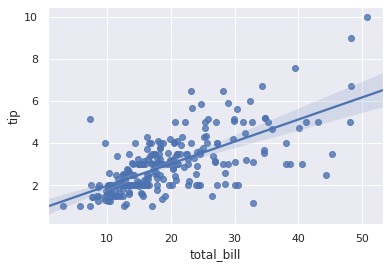

In [5]:
 ax = sns.regplot(x="total_bill", y="tip", data=tips)

From the plot above this is somewhat linear relationship between tips and total bill. But with a good few dots not fitting into the realtionship.

### <center>**Day of the Week**</center>

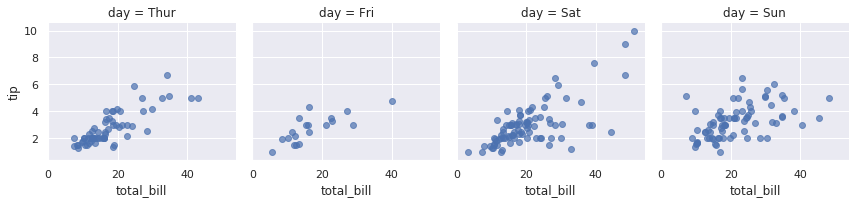

In [6]:



g = sns.FacetGrid(tips, col="day")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

#### **Count of lunches and dinners for all customers Thursday to Sunday**

#### **Count  of male and female  by each day  and time of the day served**

Got the idea on the following analysis from [[6](https://dfrieds.com/data-analysis/crosstabs-python-pandas)]

In [7]:
red = sns.light_palette("red", as_cmap=True)
pd.crosstab(index=[tips['day'], tips['sex']], columns=[tips['time'], tips['size']], ).style.background_gradient(cmap=red)

In [8]:
pd.crosstab(index=[tips['day'], tips['sex']], columns=[tips['time'], tips['size']],normalize=True ).style.background_gradient(cmap=red)

### <center>**Smoker versus Non Smoker**</center>


 
I used box plots for this because they carry lots of data in the graph.This kind of plot shows the three quartile values of the distribution along with extreme values. The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. This means that each value in the boxplot corresponds to an actual observation in the data.[[7](https://seaborn.pydata.org/tutorial/categorical.html#distributions-of-observations-within-categories)]

I didnt account for time on box plots as the restarant  busist time  is Lunch by far on Thursday and Fridays and only open for dinners on Saturday and Sundays 

#### **Box  plot of total bills and tips  for each payment for each day for separate plot for non smoker**

##### Total Bill box plot

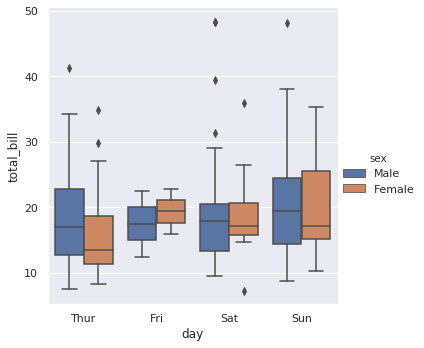

In [9]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="box", data=(tips.loc[tips.loc[:,'smoker']== 'No']))


##### Tips box plot

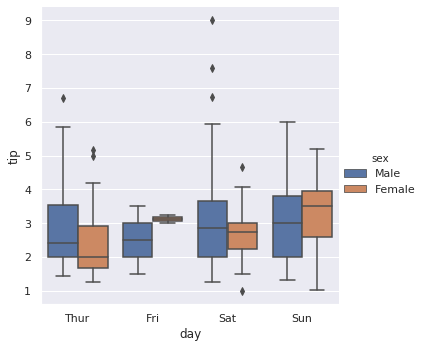

In [10]:
sns.catplot(x="day", y="tip", hue="sex",kind="box", data=(tips.loc[tips.loc[:,'smoker']== 'No']))

#### **Box  plot of total bills and tip for each payment for each day for separate plot for  smoker**

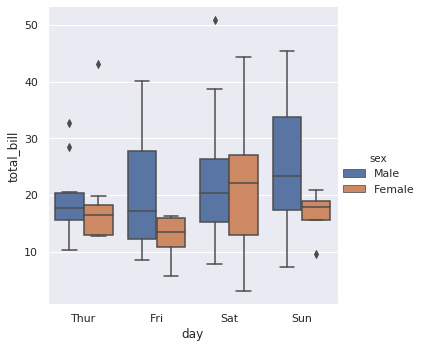

In [11]:
sns.catplot(x="day", y="total_bill", hue="sex",kind="box", data=(tips.loc[tips.loc[:,'smoker']== 'Yes']));

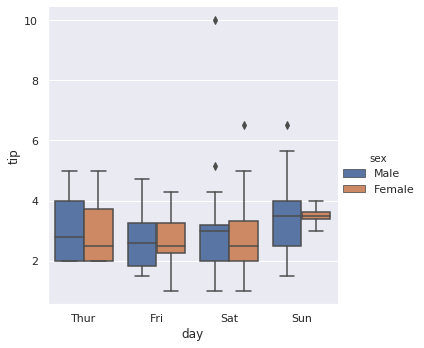

In [12]:
sns.catplot(x="day", y="tip", hue="sex",kind="box", data=(tips.loc[tips.loc[:,'smoker']== 'Yes']))

#### <center>**Scatter plots of tips versus total bill for both smokers and non smokers**</center>

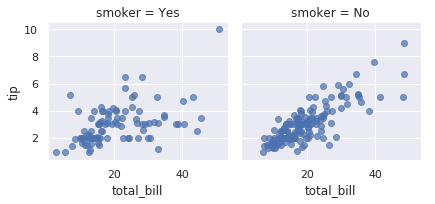

In [13]:
g = sns.FacetGrid(tips, col="smoker")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

### <center>**Males versus Female**</center>

In [14]:
pd.crosstab(index=tips['day'], columns=tips['sex'], margins=True)

sex,Male,Female,All
day,,,
Thur,30,32,62
Fri,10,9,19
Sat,59,28,87
Sun,58,18,76
All,157,87,244


In [15]:
pd.crosstab(index=tips['day'], columns=tips['sex'], margins=True,normalize=True)

sex,Male,Female,All
day,,,
Thur,0.122951,0.131148,0.254098
Fri,0.040984,0.036885,0.077869
Sat,0.241803,0.114754,0.356557
Sun,0.237705,0.073770,0.311475
All,0.643443,0.356557,1.000000


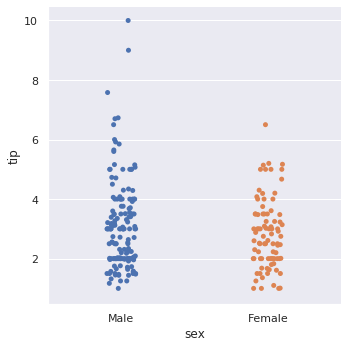

In [16]:
sns.catplot(x ="sex",y="tip",data=tips)

You can see see most tips are between 2 and 4 are both genders. And the odd male tips between 4 and 10

#### <center>**Male**</center>

The describe method where sex = 'Male'

In [17]:
(tips.loc[tips.loc[:,'sex']== 'Male']).describe()

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


#### <center>**Female**</center>

The describe method where sex = 'Female'

In [18]:
(tips.loc[tips.loc[:,'sex']== 'Female']).describe()

,total_bill,tip,size
count,87.000000,87.000000,87.000000
mean,18.056897,2.833448,2.459770
std,8.009209,1.159495,0.937644
min,3.070000,1.000000,1.000000
25%,12.750000,2.000000,2.000000
50%,16.400000,2.750000,2.000000
75%,21.520000,3.500000,3.000000
max,44.300000,6.500000,6.000000


### <center>**Scatter graph for both males and females**</center>

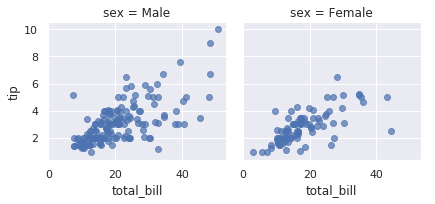

In [19]:
g = sns.FacetGrid(tips, col="sex")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

From the graph above for males the bigger the bill the bigger the tip. But for females this is the case until a limit between $4 and $6 but none other than one female tipped over $6.

### <center>**Scatter graph for both males and females for each day of the week**</center>

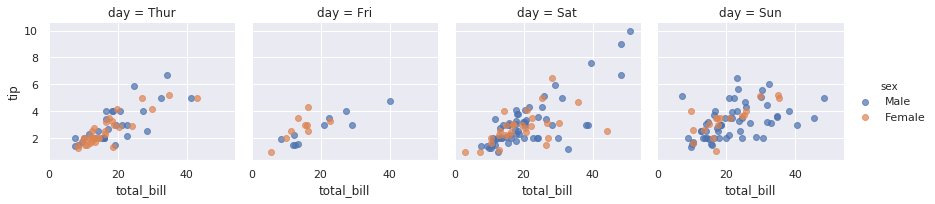

In [20]:
g = sns.FacetGrid(tips, col="day", hue="sex")
g.map(plt.scatter, "total_bill", "tip", alpha=.7)
g.add_legend();

From the graph 
- above for males the bigger the bill the bigger the tip.
- But for females this is the case until a limit between 4 and 6 but none other than one female tipped over 6. Some big tips were got on saturday night were the total bill was greater than 45. 

- You can see from the graph above most peoples total bill is between 10 and 30 .
- Saturday night was the busyest . Friday was the quiestest night. Saturday and Sunday had more men than women , while Thurday and Friday were 50/50



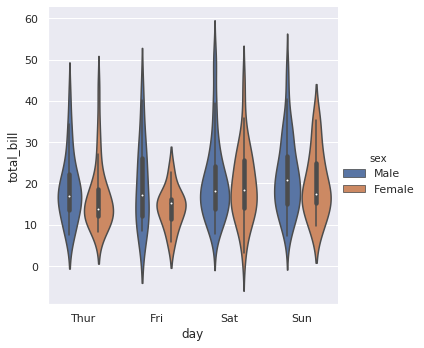

In [21]:
sns.catplot(x="day",y="total_bill",kind="violin",hue = "sex",data=tips)

In this graph, we can see that the average amount of total_bill for females is always less than the males.[2] so total bill is dependant on sex. This also shows that odd male total is between 30 and 60

### <center>**Group Size**</center>

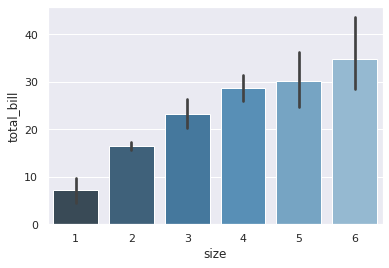

In [22]:
 ax = sns.barplot("size", y="total_bill", data=tips,palette="Blues_d")

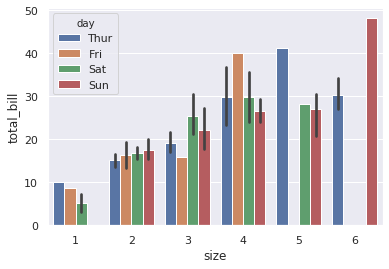

In [23]:
sns.barplot("size", y="total_bill", data=tips,hue = 'day')


## <center>**Regression**</center>

### **Whole dataset**

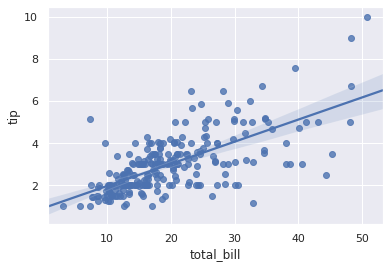

In [24]:
sns.regplot(x="total_bill", y="tip", data=tips)

There is strong  correlation between total bill and tip were sex = 'Male'  which is .67 as below

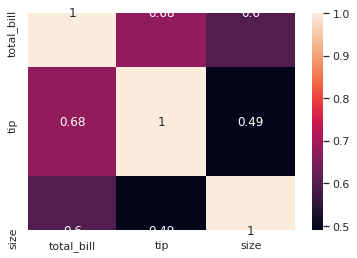

In [25]:
pearsoncorr = tips.corr(method='pearson')
sns.heatmap(pearsoncorr, 
            annot=True
            )

From the heat map above there is a strong relationship between total bill and tip which is .68 .  Total bill and size has a quite  relationship also which is .6 . And size and tip has medium correlation 

### **Sex**

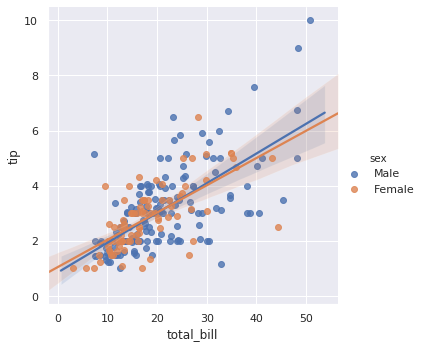

In [26]:
sns.lmplot(x="total_bill", y="tip", data=tips, hue = 'sex')

### **Male** 

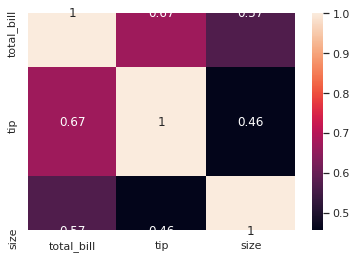

In [27]:
pearsoncorrMale = (tips.loc[tips.loc[:,'sex']== 'Male']).corr(method='pearson')
sns.heatmap(pearsoncorrMale, 
            annot=True
            )

From the heat map above there is a strong relationship between total bill and tip which is .67 .  Total bill and size has a quite  relationship also which is .57 . And size and tip has medium correlation which is .46

### **Female**

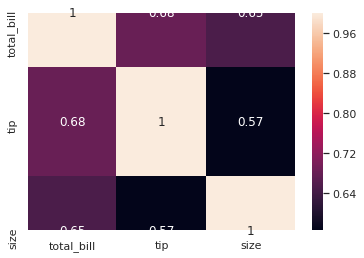

In [28]:
pearsoncorrFeMale = (tips.loc[tips.loc[:,'sex']== 'Female']).corr(method='pearson')
sns.heatmap(pearsoncorrFeMale, 
            annot=True
            )

For Female From the heat map above there is a strong relationship between total bill and tip which is .68 .  Total bill and size has a quite  relationship also which is .65 . And size of the group and tip has also strong correleation which is .57

### **Time Lunch or Dinner**

#### **Lunch**

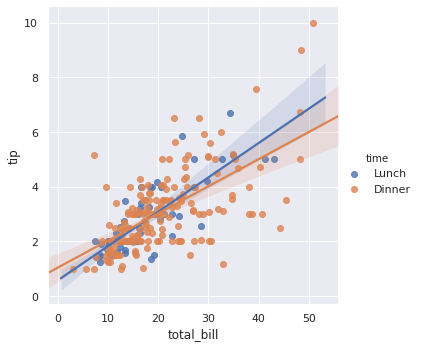

In [29]:
sns.lmplot(x="total_bill", y="tip",hue = 'time', data= tips)

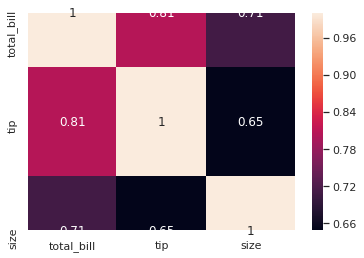

In [30]:
pearsoncorrLunch = (tips.loc[tips.loc[:,'time']== 'Lunch']).corr(method='pearson')
sns.heatmap(pearsoncorrLunch, 
            annot=True
            )

For lunchtime From the heat map above there is a strong relationship between total bill and tip which is .81 . Total bill and size has a quite relationship also which is .71 . And size of the group and tip has also strong correleation which is .65

#### **Dinner**

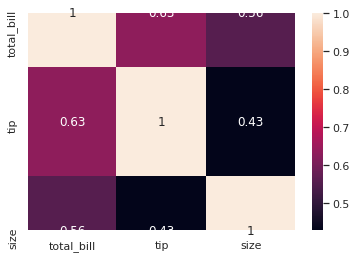

In [31]:
pearsoncorrDinner = (tips.loc[tips.loc[:,'time']== 'Dinner']).corr(method='pearson')
sns.heatmap(pearsoncorrDinner, 
            annot=True
            )

For Dinner time From the heat map above there is a strong relationship between total bill and tip which is .63 . Total bill and size has a quite relationship also which is .56 . And size of the group and tip has also moderate correleation which is .43

#### **Male and Lunch**

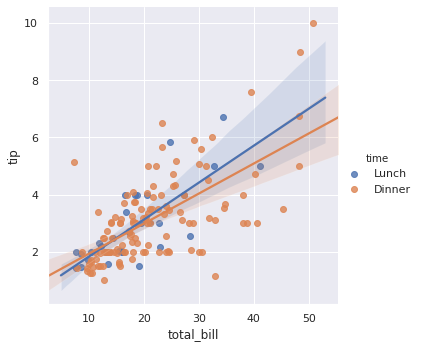

In [32]:
sns.lmplot(x="total_bill", y="tip", hue = 'time', data=(tips.loc[tips.loc[:,'sex']== 'Male']))

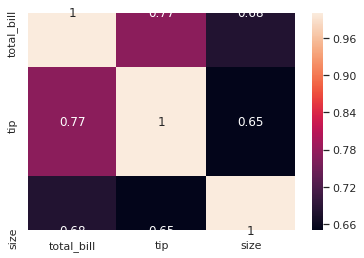

In [33]:
pearsoncorrMaleLunch = (tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Lunch')]).corr(method='pearson')
sns.heatmap(pearsoncorrMaleLunch, 
            annot=True
            )

For lunchtime  for Males From the heat map above there is a strong relationship between total bill and tip which is .77 . Total bill and size has a quite relationship also which is .68 . And size of the group and tip has also strong correleation which is .65

####  Male and Dinner Time

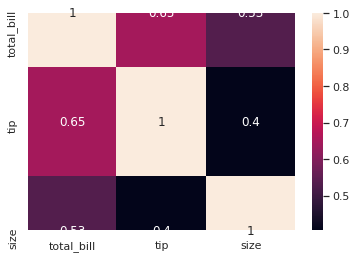

In [34]:
pearsoncorrMaleDinner = (tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'time'] == 'Dinner')]).corr(method='pearson')
sns.heatmap(pearsoncorrMaleDinner, 
            annot=True
            )

For Dinner time  for Males From the heat map above there is a strong relationship between total bill and tip which is .65 not as strong as Lunch time  . Total bill and size has a quite relationship also which is .53 . And size of the group and tip has also moderate  correleation which is .4

#### **Female and Lunch**

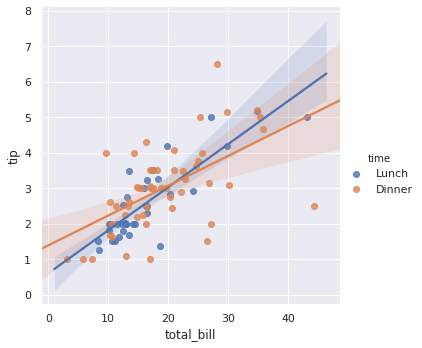

In [35]:
sns.lmplot(x="total_bill", y="tip", hue = 'time', data=(tips.loc[tips.loc[:,'sex']== 'Female']))

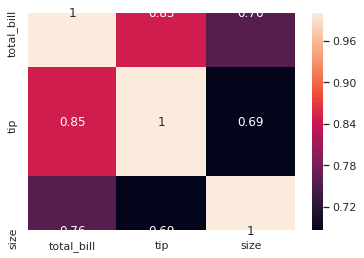

In [36]:
pearsoncorrFemaleLunch = (tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Lunch')]).corr(method='pearson')
sns.heatmap(pearsoncorrFemaleLunch, 
            annot=True
            )

For Lunch time for Females From the heat map above there is a strong relationship between total bill and tip which is .85 n . Total bill and size has a also relationship also which is .76 . And size of the group and tip has also strong correleation which is .69

#### **Female and Dinner**

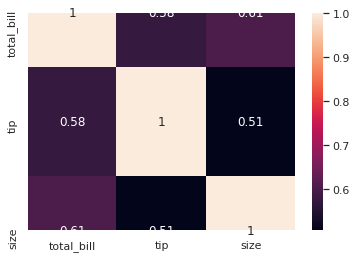

In [37]:
pearsoncorrFemaleDinner = (tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'time'] == 'Dinner')]).corr(method='pearson')
sns.heatmap(pearsoncorrFemaleDinner, 
            annot=True
            )

For Dinner time for Females From the heat map above there is a strong relationship between total bill and tip which is .58 not as strong as lucnh time  . Total bill and size has a also relationship also which is .61 . And size of the group and tip has also strong enough almost moderate  correleation which is .51

#### Time and day of the week 

From a previous analysis it was found that resatarant was only opened  for Dinner saturday and Sunday . Thursday evening was very quite only one customer 



#### Thursday 

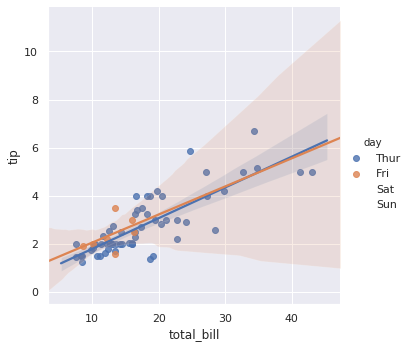

In [38]:
sns.lmplot(x="total_bill", y="tip", hue = 'day', data=(tips.loc[tips.loc[:,'time']== 'Lunch']))

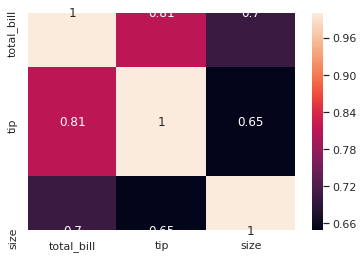

In [39]:
pearsoncorrThursLunch = (tips.loc[(tips.loc[:,'day']== 'Thur')  & (tips.loc[:,'time'] == 'Lunch')]).corr(method='pearson')
sns.heatmap(pearsoncorrThursLunch, 
            annot=True
            )

For Thursday at lunch time From the heat map above there is a strong relationship between total bill and tip which is .81 not as strong as lucnh time  . Total bill and size has a also relationship also which is .7 . And size of the group and tip has also strong  correleation which is .65

### Friday lunch time 

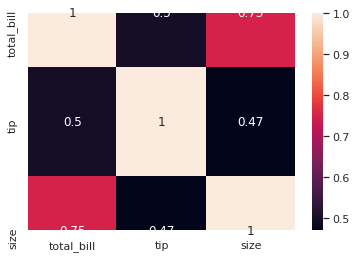

In [40]:
pearsoncorrFriLunch = (tips.loc[(tips.loc[:,'day']== 'Fri')  & (tips.loc[:,'time'] == 'Lunch')]).corr(method='pearson')
sns.heatmap(pearsoncorrFriLunch, 
            annot=True
            )

For Friday at lunch time From the heat map above there is only a moderate  relationship between total bill and tip which is .5 not as strong as lucnh time  . Total bill and size has a also relationship also which is .7 . And size of the group and tip has also moderate  correleation which is .47

### Dinner Time 

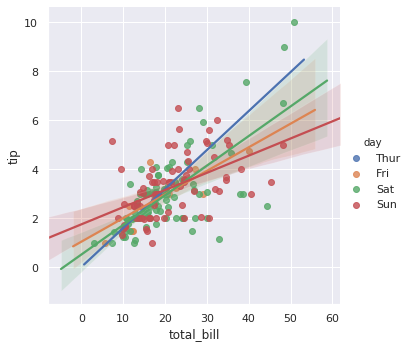

In [41]:
sns.lmplot(x="total_bill", y="tip", hue = 'day', data=(tips.loc[tips.loc[:,'time']== 'Dinner']))

### Friday Dinner time 

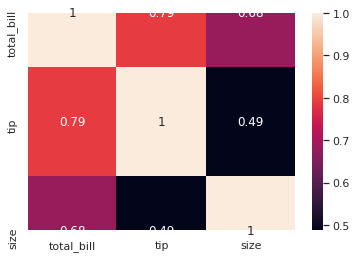

In [42]:
pearsoncorrFriDinner = (tips.loc[(tips.loc[:,'day']== 'Fri')  & (tips.loc[:,'time'] == 'Dinner')]).corr(method='pearson')
sns.heatmap(pearsoncorrFriDinner, 
            annot=True
            )

For Friday at Dinner time From the heat map above there is strong  relationship between total bill and tip which is .79 not as strong as lucnh time  . Total bill and size has a also relationship also which is .68. And size of the group and tip has also moderate  correleation which is .49

### Saturday Dinner Time

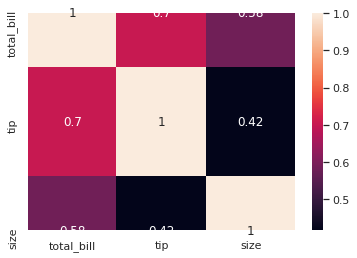

In [43]:
pearsoncorrSatDinner = (tips.loc[(tips.loc[:,'day']== 'Sat')  & (tips.loc[:,'time'] == 'Dinner')]).corr(method='pearson')
sns.heatmap(pearsoncorrSatDinner, 
            annot=True
            )

For Saturday at Dinner time From the heat map above there is strong  relationship between total bill and tip which is .7 not as strong as lucnh time  . Total bill and size has a moderate strong relationship also which is .58. And size of the group and tip has also moderate  correleation which is .42

### Sunday dinner 

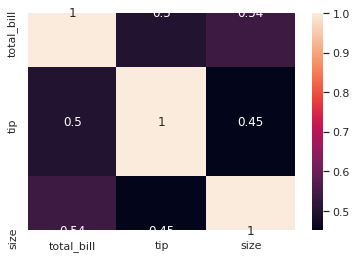

In [44]:
pearsoncorrSunDinner = (tips.loc[(tips.loc[:,'day']== 'Sun')  & (tips.loc[:,'time'] == 'Dinner')]).corr(method='pearson')
sns.heatmap(pearsoncorrSunDinner, 
            annot=True
            )

For Sunday at Dinner time From the heat map above there is only a moderate  relationship between total bill and tip which is .5 not as strong as lucnh time  . Total bill and size has a moderate strong relationship also which is .54. And size of the group and tip has also moderate  correleation which is .45

#### Smoker or Non Smoker

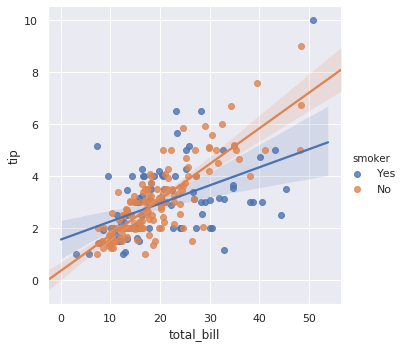

In [45]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=tips)

### Smoker 

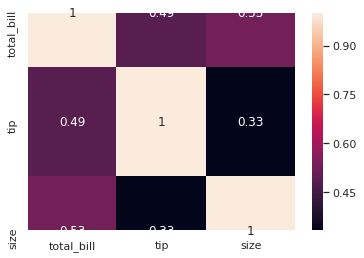

In [46]:
pearsoncorrsmoker = (tips.loc[tips.loc[:,'smoker']== 'Yes']).corr(method='pearson')
sns.heatmap(pearsoncorrsmoker, 
            annot=True
            )

For smokers  From the heat map above there is only a moderate  relationship between total bill and tip which is .49 not as strong as lucnh time  . Total bill and size has a moderate strong relationship also which is .53. And size of the group and tip has also moderate to weak  correleation which is .33

### Non Smoker 

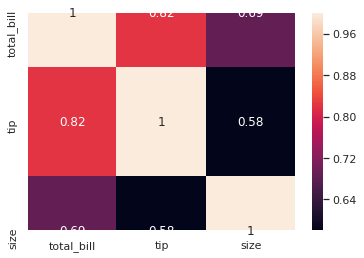

In [47]:
pearsoncorrnonsmoker = (tips.loc[tips.loc[:,'smoker']== 'No']).corr(method='pearson')
sns.heatmap(pearsoncorrnonsmoker, 
            annot=True
            )

For non smokers  From the heat map above there is a very strong  relationship between total bill and tip which is .82. Total bill and size has a strong relationship also which is .69. And size of the group and tip has also strong to moderate correalation which is .58

### Smoker and Sex

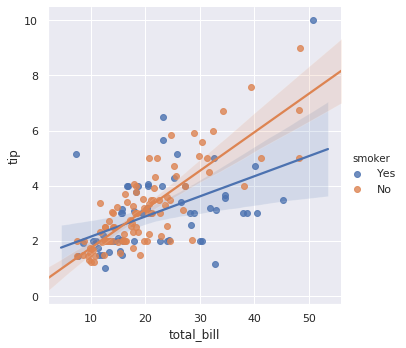

In [48]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=(tips.loc[tips.loc[:,'sex']== 'Male']))

### Male Smoker 

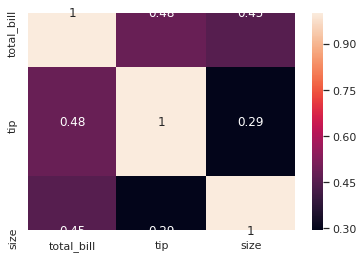

In [49]:
pearsoncorrsmokerMale = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerMale, 
            annot=True
            )

For Male smokers  From the heat map above there is only a moderate  relationship between total bill and tip which is .48 not as strong as lucnh time  . Total bill and size has a strong relationship also which is .45. And size of the group and tip has also  weak  correleation which is .29

In [50]:
### Male Non Smoker

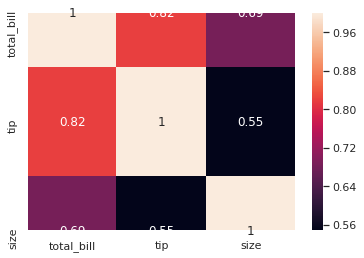

In [51]:
pearsoncorrsmokerMale = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerMale, 
            annot=True
            )

For  Male non smokers  From the heat map above there is a very strong  relationship between total bill and tip which is .82. Total bill and size has a strong relationship also which is .69. And size of the group and tip has also strong to moderate correalation which is .55

### Female Smoker or Non Smoker 

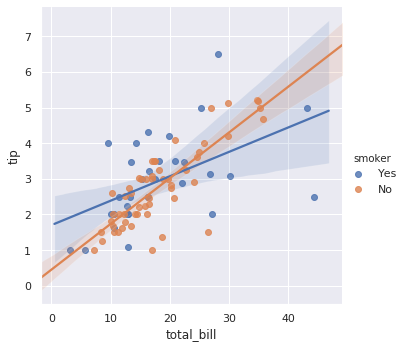

In [52]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=(tips.loc[tips.loc[:,'sex']== 'Female']))

### Smoker Female

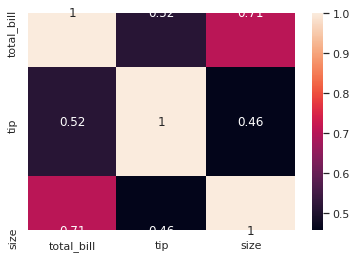

In [53]:
pearsoncorrsmokerFemale = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerFemale, 
            annot=True
            )

For Smoker smokers  From the heat map above there is only a moderate  relationship between total bill and tip which is .52 not as strong as lucnh time  . Total bill and size has a strong relationship also which is .71. And size of the group and tip has also  moderate  correleation which is .46

### Female non Smoker 

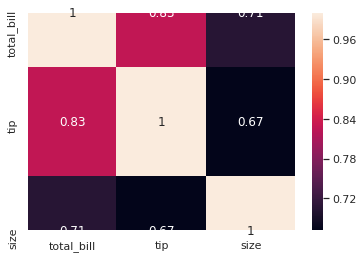

In [54]:
pearsoncorrsmokerNonFemale = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerNonFemale, 
            annot=True
            )

For non smoker female From the heat map above there is very strong relationship between total bill and tip which is .83 not as strong as lucnh time  . Total bill and size has a strong relationship also which is .71. And size of the group and tip has strong  correleation which is .67

### Smoker and Day of the week 

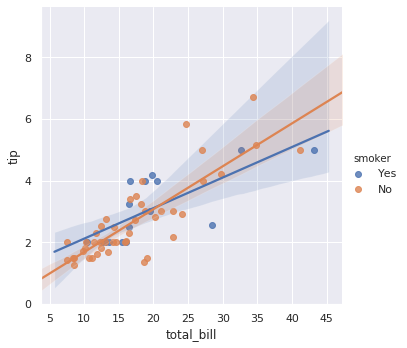

In [55]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=(tips.loc[tips.loc[:,'day']== 'Thur']))

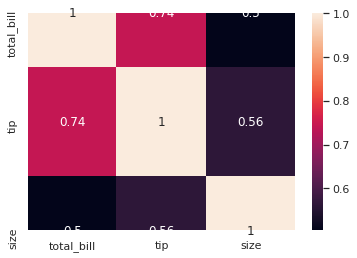

In [56]:
pearsoncorrsmokerSmokerThur = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Thur')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerThur, 
            annot=True
            )

For smokers on Thurdays From the heat map above there is  strong relationship between total bill and tip which is .74 not as strong as lucnh time  . Total bill and size has a moderate relationship as correaltions is  .5 And size of the group and tip has strong to moderate  correleation which is .56

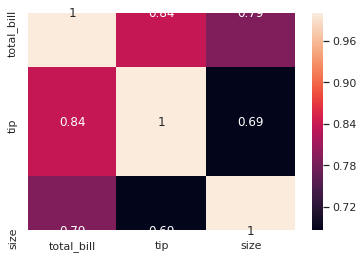

In [57]:
pearsoncorrNosmokerSmokerThur = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Thur')]).corr(method='pearson')
sns.heatmap(pearsoncorrNosmokerSmokerThur, 
            annot=True
            )

For Non Smokers on Thurdays From the heat map above there is  strong relationship between total bill and tip which is .84 not as strong as lucnh time  . Total bill and size has a strong relationship as correaltions is  .73 And size of the group and tip has strong to quite strong  correleation which is .69

### Fridays and Smokers 

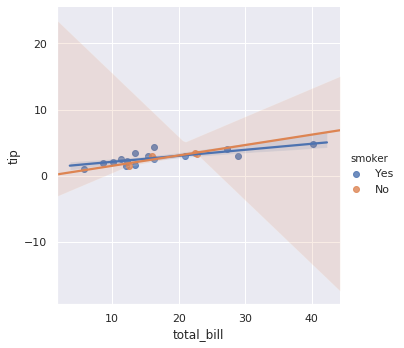

In [58]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=(tips.loc[tips.loc[:,'day']== 'Fri']))

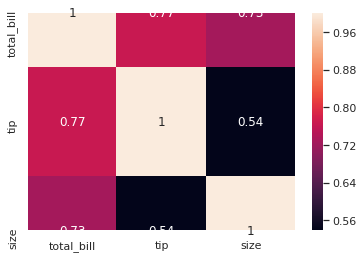

In [59]:
pearsoncorrsmokerSmokerFri = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Fri')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerFri, 
            annot=True
            )

For smokers Friday trong as lucnh time  . Total bill and size has a strong relationship as correaltions is  .77 And size of the group and tip has strong to quite strong  correleation which is .63 and moderate to strong correltion between tip and size of the group is .54

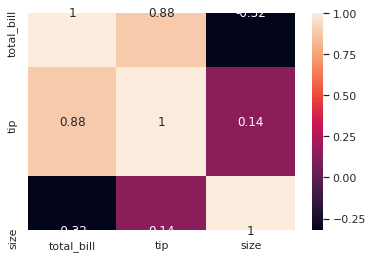

In [60]:
pearsoncorrsmokerNonSmokerFri = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Fri')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerNonSmokerFri, 
            annot=True
            )

For non smokers Friday  . Total bill and size has a strong relationship as correaltions is  .88 And size of the group and tip has  only a moderate corrlation which is .32 and allmost no realtionaship between group and tip only  .14

### Saturday 

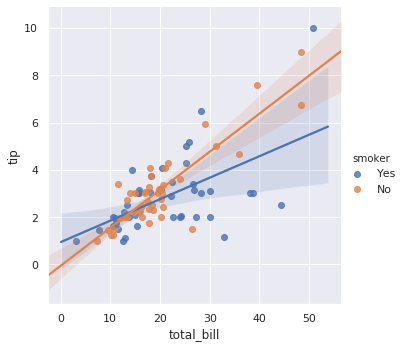

In [61]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=(tips.loc[tips.loc[:,'day']== 'Sat']))

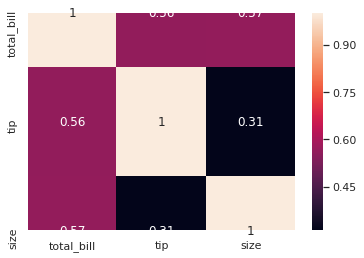

In [62]:
pearsoncorrsmokerSmokerSat = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Sat')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerSat, 
            annot=True
            )

For smokers on Saturday . Total bill and size has a moderate relationship as correaltions is  .56 And size of the group and totla bill has  only a moderate corrlation which is .57 and tip and size of the group has moderate realtionship .31

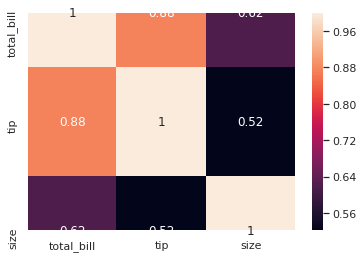

In [63]:
pearsoncorrsmokerNonSmokerSat = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Sat')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerNonSmokerSat, 
            annot=True
            )

For non smokers on Saturday . Total bill and size has a very strong relationship as correaltions is  .88And size of the group and totla bill has  quite strong correlation which is .62 and tip and size of the group has moderate realtionship .52

### Sunday and Smokers

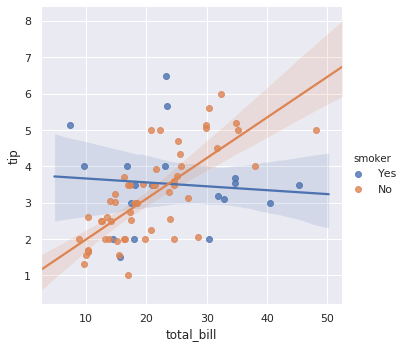

In [64]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data=(tips.loc[tips.loc[:,'day']== 'Sun']))

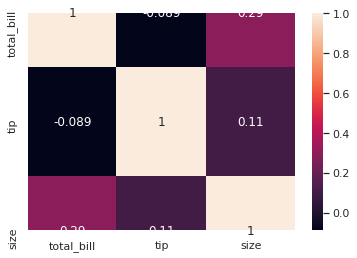

In [65]:
pearsoncorrsmokerSmokerSun = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Sun')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerSun, 
            annot=True
            )

For  smokers on Sunday. Total bill and size has no relationship as  correaltions is  -089.And size of the group and total bill has  weak  correlation which is .23 and tip and size of the group has weak realtionship .11

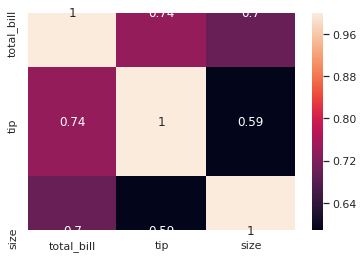

In [66]:
pearsoncorrsmokerSmokerSun = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Sun')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerSun, 
            annot=True
            )

For non smokers on Sunday. Total bill and size has a very strong relationship as correaltions is  .74.And size of the group and total bill has  quite strong correlation which is .7 and tip and size of the group has moderate realtionship .59

#### Smoker day of the week and sex of the person 

## Male Thurday

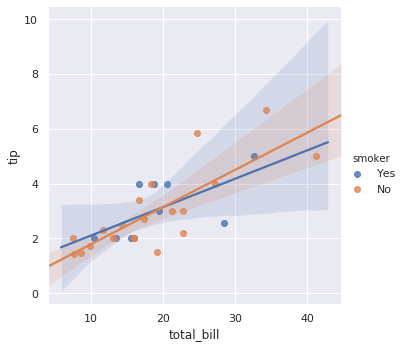

In [67]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data= (tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day'] == 'Thur')]) )

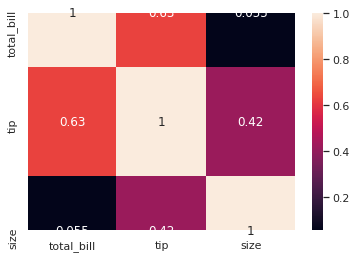

In [68]:
pearsoncorrsmokerSmokerMaleThur = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Thur') & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerMaleThur , 
            annot=True
            )

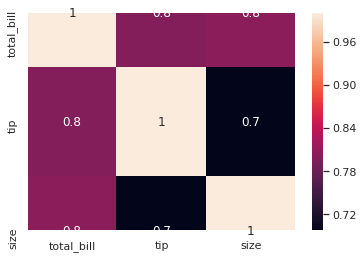

In [69]:
pearsoncorrsmokerSmokerMaleThur = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Thur') & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerMaleThur , 
            annot=True
            )

### Female Smoker or Non Smoker on thurday 

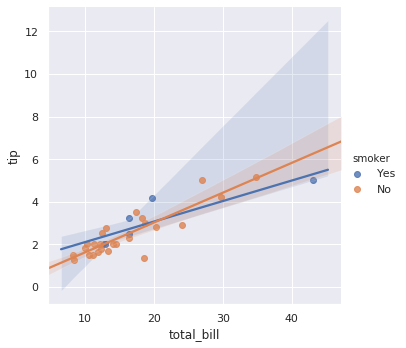

In [70]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data= (tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'day'] == 'Thur')]) )

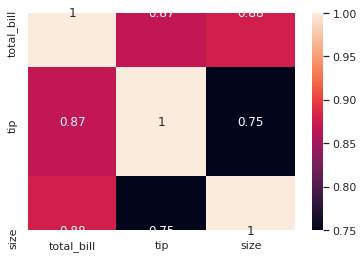

In [71]:
pearsoncorrsmokerSmokerFemaleThur = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Thur') & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerFemaleThur , 
            annot=True
            )

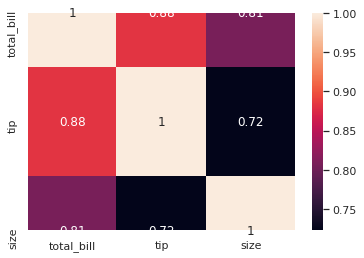

In [72]:
pearsoncorrsmokerSmokerNonFemaleThur = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Thur') & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerNonFemaleThur , 
            annot=True
            )

### Male smoker Friday 

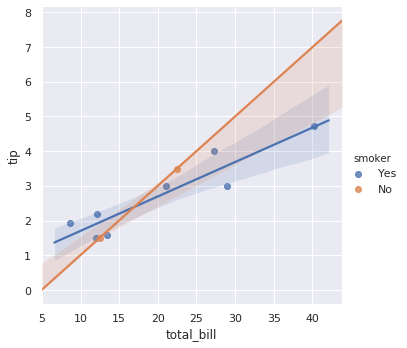

In [73]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data= (tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day'] == 'Fri')]) )

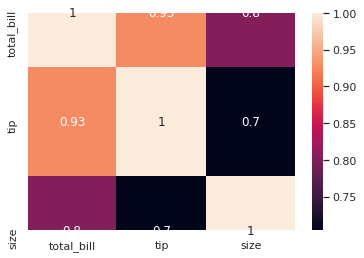

In [74]:
pearsoncorrsmokerSmokerMaleFri = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Fri') & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerMaleFri , 
            annot=True
            )

### female Fridays smoker or non Smoker 

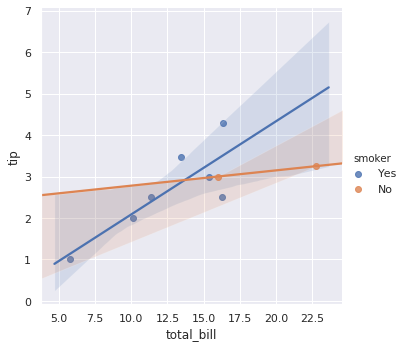

In [75]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data= (tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'day'] == 'Fri')]) )

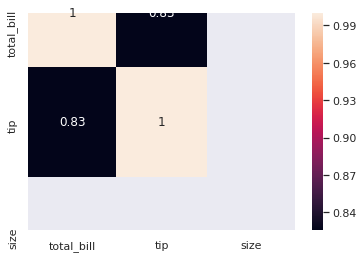

In [76]:
pearsoncorrsmokerSmokerFemaleFri = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Fri') & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerFemaleFri , 
            annot=True
            )

## male Saturday smoker / non smoker 

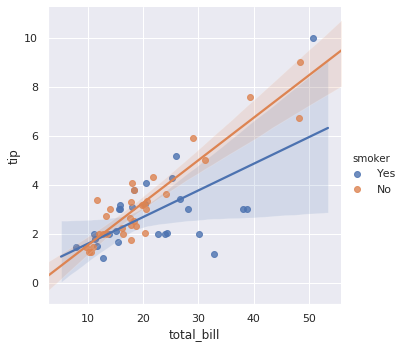

In [77]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data= (tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day'] == 'Sat')]) )

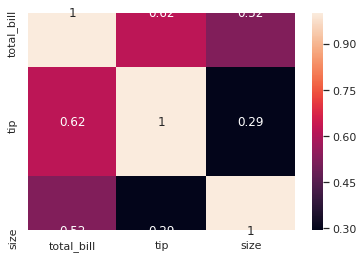

In [78]:
pearsoncorrsmokerSmokerMalesat = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Sat') & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerMalesat , 
            annot=True
            )

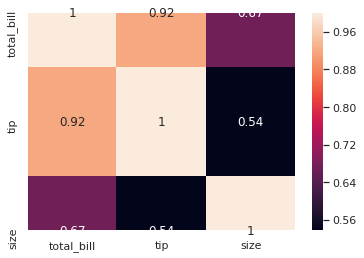

In [79]:
pearsoncorrsmokerSmokerNonMalesat = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Sat') & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerNonMalesat , 
            annot=True
            )

#### Female smoker / non smoker saturday 

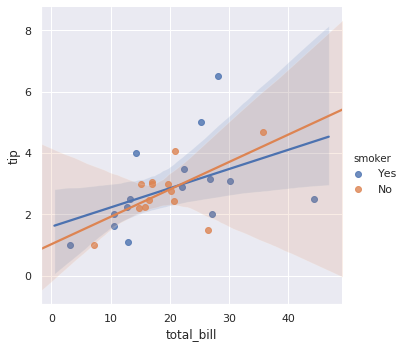

In [80]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data= (tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'day'] == 'Sat')]) )

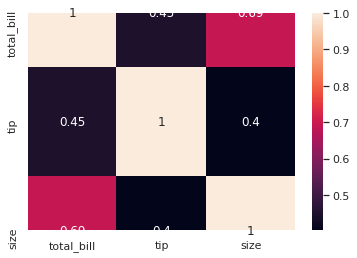

In [81]:
pearsoncorrsmokerSmokerFeMalesat = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Sat') & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerFeMalesat , 
            annot=True
            )

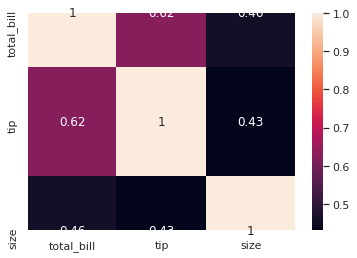

In [82]:
pearsoncorrsmokerSmokerNonFeMalesat = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Sat') & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerNonFeMalesat , 
            annot=True
            )

### Sunday Male smoker /non smoker 

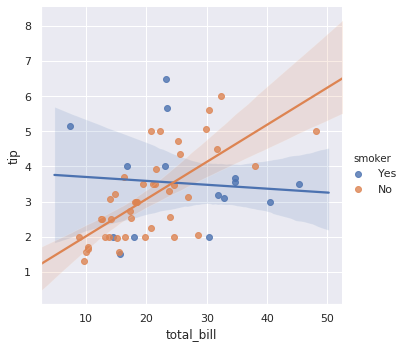

In [83]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data= (tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day'] == 'Sun')]) )

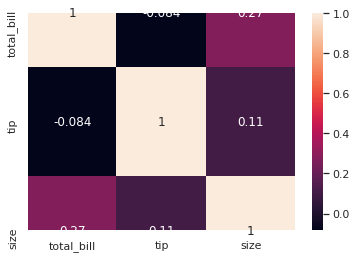

In [84]:
pearsoncorrsmokerSmokerMalesun = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Sun') & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerMalesun , 
            annot=True
            )

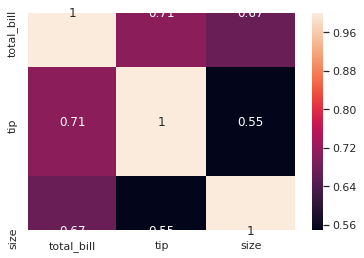

In [85]:
pearsoncorrsmokerSmokerMalesunNo = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Sun') & (tips.loc[:,'sex'] == 'Male')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerMalesunNo , 
            annot=True
            )

### Female sunday smoker / non smoker 

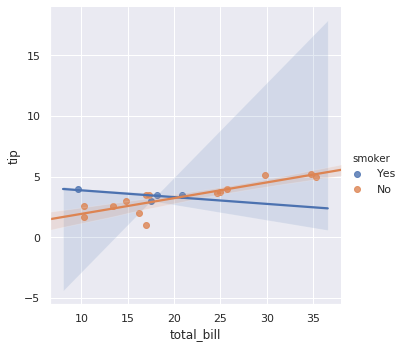

In [86]:
sns.lmplot(x="total_bill", y="tip", hue = 'smoker', data= (tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'day'] == 'Sun')]) )

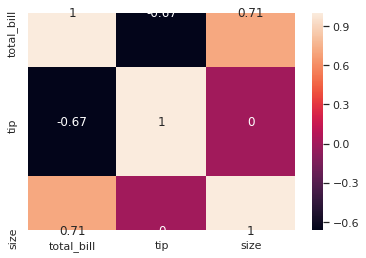

In [87]:
pearsoncorrsmokerSmokerFeMalesun = (tips.loc[(tips.loc[:,'smoker']== 'Yes')  & (tips.loc[:,'day'] == 'Sun') & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerFeMalesun , 
            annot=True
            )

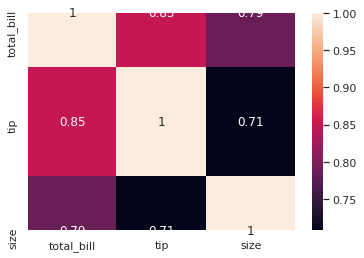

In [88]:
pearsoncorrsmokerSmokerNoFeMalesun = (tips.loc[(tips.loc[:,'smoker']== 'No')  & (tips.loc[:,'day'] == 'Sun') & (tips.loc[:,'sex'] == 'Female')]).corr(method='pearson')
sns.heatmap(pearsoncorrsmokerSmokerNoFeMalesun , 
            annot=True
            )

## <center>**Analysis**</center>

For this section we use  k-Nearest-Neighbors (k-NN) which  is a supervised machine learning model. Supervised learning is when a model learns from data that is already labeled. A supervised learning model takes in a set of input objects and output values. The model then trains on that data to learn how to map the inputs to the desired output so it can learn to make predictions on unseen data.[[12](https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a)]

#### **Male Smoker or Non Smoker on Sunday**

From the prevoius section there was vast differences values for total values and tips beween Male smokers and non Smokers on a Sunday.  so I use the  k-Nearest-Neighbors (k-NN) on this to predict output on test data

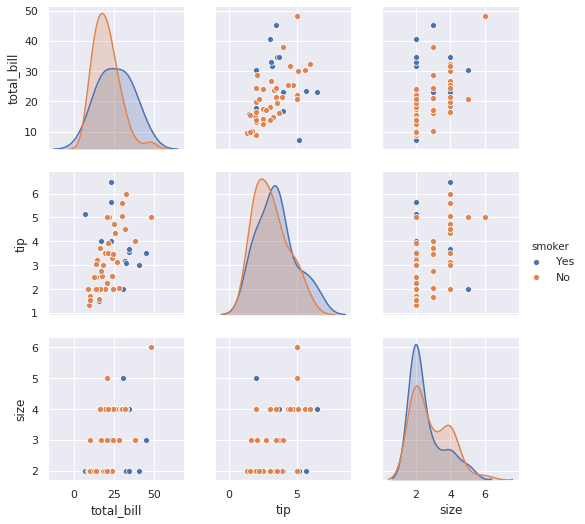

In [89]:
sns.pairplot((tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day'] == 'Sun')]), hue='smoker')

From the graph above I decided do a k nearest neighbour on the total bill versus tip 

In [90]:
inputs = (tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day'] == 'Sun')])[['total_bill', 'tip']]
outputs = (tips.loc[(tips.loc[:,'sex']== 'Male')  & (tips.loc[:,'day'] == 'Sun')])['smoker']

In [91]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3)
knn = nei.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

 Model Accuracy, 

In [92]:

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


#### Female Smoker on thurday

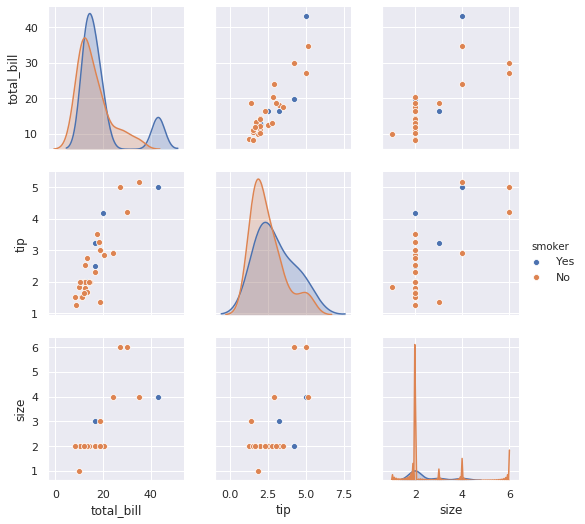

In [134]:
sns.pairplot((tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'day'] == 'Thur')]), hue='smoker')

In [132]:
inputsSmoker = (tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'day'] == 'Thur')])[['total_bill','tip']]
outputsSmoker = (tips.loc[(tips.loc[:,'sex']== 'Female')  & (tips.loc[:,'day'] == 'Thur')])['smoker']

In [133]:
X_trainS, X_testS, y_trainS, y_testS = train_test_split(inputsSmoker, outputsSmoker, test_size=0.3)
knn = nei.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_trainS,y_trainS)
y_predS = knn.predict(X_testS)
print("Accuracy:",metrics.accuracy_score(y_testS, y_predS))

Accuracy: 0.7


### <center>**Conclusion**</center>

Data we have is only for 4 days from Thursday to Sunday

- Thursday busiest at lunchtime with 61 tables ,
- Friday is mixed and is quiest day of the week with only 19 tables.
- Satuday and Sunday 
   - There is no data for lunch time for Saturday and Sunday thus its assumed its closed saw no references otherwise
- Satuday is the buiest day of the week
- The 64% table bill had males paying for the bill
- The 64% tables have 2 people per table 
- There is huge differnce between male smokers and non smokers in the weekend 
    - on on Saturday night night for non smokers there is very strong correlation .92 . On the other hand smokers had really no correlation -0.084 , tips didnt depend on total bill for smokers 

     - on Sunday night for non smokers there is very strong correlation .71 . On the other hand smokers had really no correlation -0.084 , tips didnt depend on total bill for smokers 
    - For Females non smokers on Saturday night corrleation was .62 . its weaker relationship than males because not one non smoking female tiped over 5.00.
    - On Sundays there is a strong corrleation between total bill and tip correlation .81 for female non smoker while just like for mfor female smoker corrleation is -.67 which means tips are bigger if bill was smaller 
- Thursday was interesting as for this analysis 
   - there a moderate - strong corelations between total bill and tips for males smoker .63 and no realtionship with size of the group wtih is 0.051 while for non smoking males there is a very strong corrlection between total bill and tips which is .81. also there is strong correaltion between tips and size of the group as well , 
   - For females this is a lot diffent 
   - For there is very little differnece smokers and non smokers regards to total bill and tips corrleation .87 and .88 respecely .Another interting thing that there was strong corrlation between group size and tips for both smokers and non smoker females , its even stronger for smokers .88 while non smokers is .81Data we have is only for 4 days from Thursday to Sunday

- Thursday busiest at lunchtime with 61 tables ,
- Friday is mixed and is quiest day of the week with only 19 tables.
- Satuday and Sunday 
   - There is no data for lunch time for Saturday and Sunday thus its assumed its closed saw no references otherwise
- Satuday is the buiest day of the week
- The 64% table bill had males paying for the bill
- The 64% tables have 2 people per table 
- There is huge differnce between male smokers and non smokers in the weekend 
    - on on Saturday night night for non smokers there is very strong correlation .92 . On the other hand smokers had really no correlation -0.084 , tips didnt depend on total bill for smokers 

     - on Sunday night for non smokers there is very strong correlation .71 . On the other hand smokers had really no correlation -0.084 , tips didnt depend on total bill for smokers 
    - For Females non smokers on Saturday night corrleation was .62 . its weaker relationship than males because not one non smoking female tiped over 5.00.
    - On Sundays there is a strong corrleation between total bill and tip correlation .81 for female non smoker while just like for mfor female smoker corrleation is -.67 which means tips are bigger if bill was smaller 
- Thursday was interesting as for this analysis 
   - there a moderate - strong corelations between total bill and tips for males smoker .63 and no realtionship with size of the group wtih is 0.051 while for non smoking males there is a very strong corrlection between total bill and tips which is .81. also there is strong correaltion between tips and size of the group as well , 
   - For females this is a lot diffent 
   - For there is very little differnece smokers and non smokers regards to total bill and tips corrleation .87 and .88 respecely .Another interting thing that there was strong corrlation between group size and tips for both smokers and non smoker females , its even stronger for smokers .88 while non smokers is .81

### **Referecnes**


1.  Ranjeet Jain seaborn_tips_dataset
https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset

2. Sanket Doshi Analyze the data through data visualization using Seaborn https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e

3.  Seaborn, Seaborn.regplot, https://seaborn.pydata.org/generated/seaborn.regplot.html

4. stackoverflow, Seaborn Pairplot Pearsons P statistic https://stackoverflow.com/questions/34255242/seaborn-pairplot-pearsons-p-statistic?lq=1

5. Hadley Wickham,The Journal of Statistical Software, vol. 59, 2014.,Tidy data,  http://vita.had.co.nz/papers/tidy-data.html

6. Dan Friedman, Data Analysis Data Wrangling Tutorial, crosstabs() Method: Compute Aggregated Metrics Across Categorical Columns,https://dfrieds.com/data-analysis/crosstabs-python-pandas

7. Seaborn , Plotting with categorical data,Boxplots https://seaborn.pydata.org/tutorial/categorical.html#distributions-of-observations-within-categories

8. Seaborn, Visualizing the distribution of a dataset,Kernel density estimation, https://seaborn.pydata.org/tutorial/distributions.html

9. Dan Friedman ,Data Analysis Data Wrangling Tutorial,Create New Columns Based on Operations  https://dfrieds.com/data-analysis/create-new-column-python-pandas

10. wellsr.com, Introduction to Seaborn Plots for Python Data Visualization,https://wellsr.com/python/seaborn-plots-for-python-data-visualization/

11. StatisticsSolutions, Pearson’s Correlation Coefficient,https://www.statisticssolutions.com/pearsons-correlation-coefficient/

12. towards Data Science,Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn,https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a